In [1]:
import pandas as pd 
import numpy as np
import prophet 
from prophet.plot import add_changepoints_to_plot
import warnings
import matplotlib.pyplot as plt 

In [4]:
df =pd.read_csv('daily-total-female-births-CA.csv',parse_dates=['date'],date_parser=pd.to_datetime)
df.columns=['ds','y']
df.head()

,ds,y
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


Text(0.5, 1.0, 'Daily Female Births in 1959')

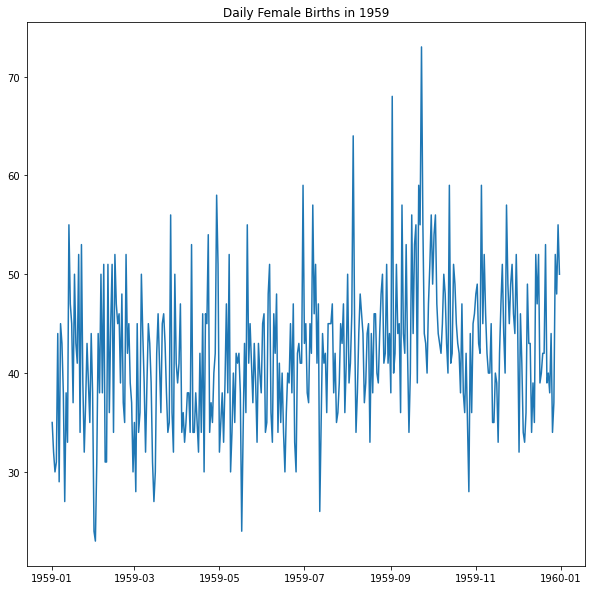

In [8]:
plt.figure(figsize=(10,10))
plt.plot(df['ds'],df['y'])
plt.title('Daily Female Births in 1959')

In [9]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    m=prophet.Prophet(yearly_seasonality=True,daily_seasonality=False,changepoint_prior_scale=0.5,changepoint_range=0.9,seasonality_mode='multiplicative')

    m.fit(df)

future=m.make_future_dataframe(periods=50,freq='d')
forecast=m.predict(future)

23:58:17 - cmdstanpy - INFO - Chain [1] start processing
23:58:17 - cmdstanpy - INFO - Chain [1] done processing


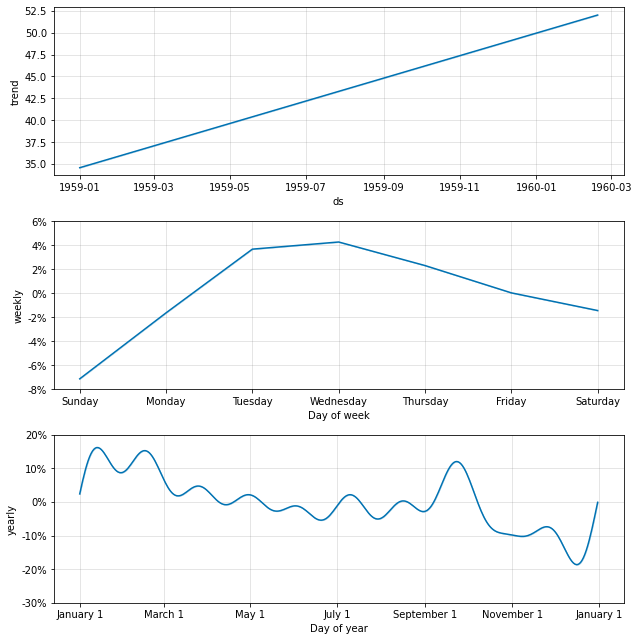

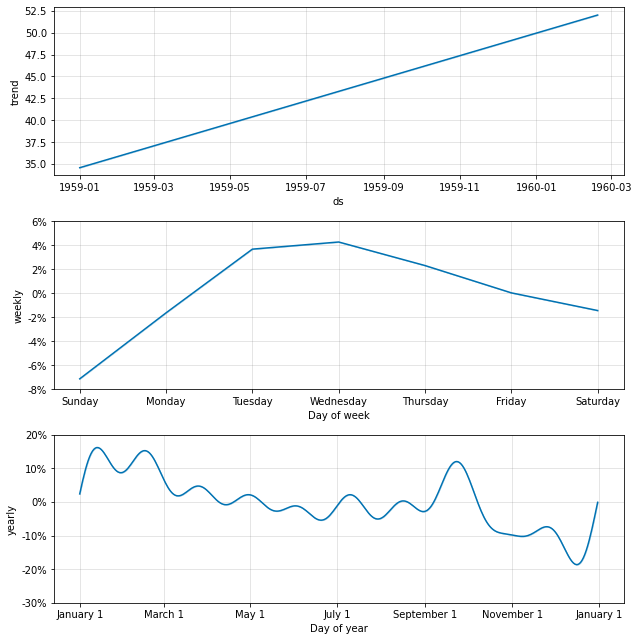

In [12]:
m.plot_components(forecast)

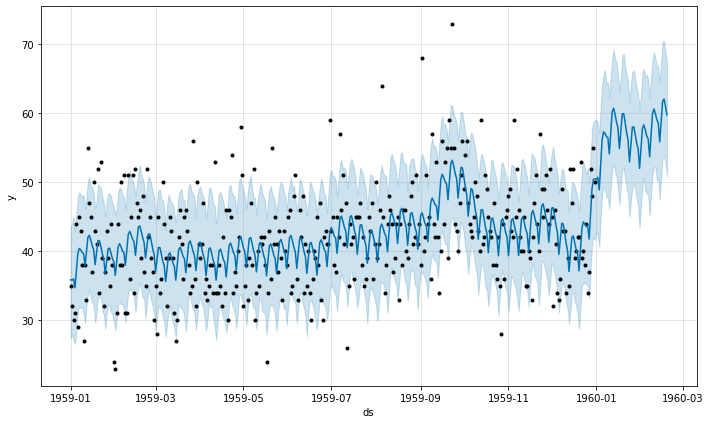

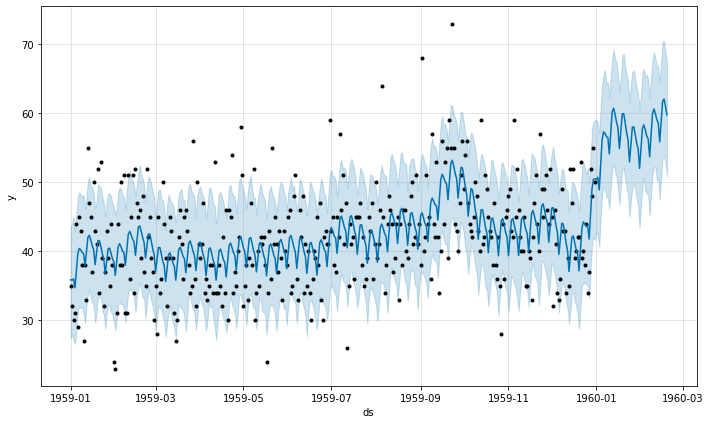

In [13]:
m.plot(forecast)